In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ny_map = pd.read_json("ny_map_data_res80.json")

In [4]:
len(ny_map)

6400

In [5]:
ny_map.head()

,county_name,lat,lng,state
0,Pike,41.403671,-74.984937,PA
1,Kawartha Lakes,44.788228,-79.055823,ON
2,Montgomery,42.920886,-74.476076,NY
3,Chautauqua,42.162278,-79.666456,NY
4,Rensselaer,42.862532,-73.661899,NY


In [6]:
ny_map["lng_rank"] = ny_map.lng.rank(method = "dense")
ny_map["lat_rank"] = ny_map.lat.rank(method = "dense")

In [26]:
ny_map["nyc"] = ny_map.county_name.map(lambda x: x in ["New York", "Bronx", "Richmond", "Kings", "Queens"])

In [27]:
ny_map_restricted = ny_map[ny_map.state == "NY"]

In [28]:
ny_map_restricted.groupby("county_name").count().sort_values("lat").head()

,lat,lng,state,lng_rank,lat_rank,nyc
county_name,,,,,,
New York,1,1,1,1,1,1
Bronx,2,2,2,2,2,2
Richmond,3,3,3,3,3,3
Kings,4,4,4,4,4,4
Queens,5,5,5,5,5,5


In [9]:
ny_map[ny_map.county_name == "Kings"]

,county_name,lat,lng,state,lng_rank,lat_rank
2491,Kings,40.645063,-73.967215,NY,59.0,4.0
2959,Kings,40.645063,-73.865443,NY,60.0,4.0
5992,Kings,40.703418,-73.967215,NY,59.0,5.0
6332,Kings,40.586709,-73.967215,NY,59.0,3.0


In [10]:
ny_map[ny_map.county_name == "Queens"]

,county_name,lat,lng,state,lng_rank,lat_rank
157,Queens,40.703418,-73.865443,NY,60.0,5.0
1205,Queens,40.761772,-73.865443,NY,60.0,6.0
3393,Queens,40.645063,-73.763671,NY,61.0,4.0
3554,Queens,40.703418,-73.763671,NY,61.0,5.0
4335,Queens,40.761772,-73.763671,NY,61.0,6.0


In [21]:
sns.set_style("dark")

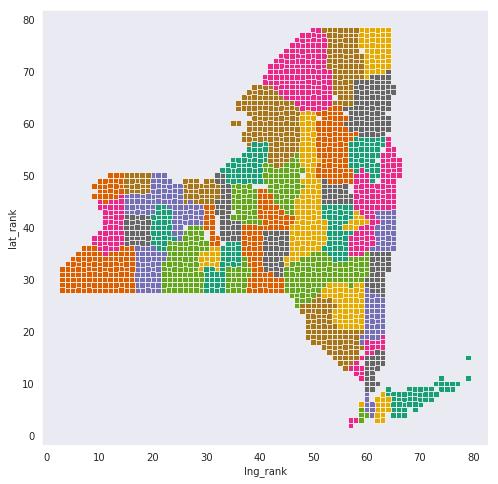

In [53]:
fig, ax = plt.subplots(figsize = (8, 8))

ax = sns.scatterplot(data = ny_map_restricted, x = "lng_rank", y = "lat_rank", hue = "county_name", marker = "s", palette = "Dark2", s = 35)

ax.legend_.remove()